In [1]:
import cv2
from super_resolution import *
%matplotlib inline

In [2]:
import os
def load_imgs_2(dir_path):
    name_list = os.listdir(dir_path)

    img_list = []

    for name in name_list:
        img_path = "{}/{}".format(dir_path, name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_list.append(img)
    return img_list


In [3]:
tf.reset_default_graph()

In [4]:
sess = tf.Session()

In [5]:
usrcnn = USRCNN(sess)
usrcnn.load(sess, './model/proto2.ckpt', "./model/meta_data.pickle")
print("load done")

load done


In [6]:
test_img_list = load_imgs_2("./data/celeba")
test_img = test_img_list[10]
test_img_resized = cv2.resize(test_img, (test_img.shape[1]//3, test_img.shape[0]//3), interpolation = cv2.INTER_CUBIC)
test_img_resized = cv2.resize(test_img_resized, (test_img.shape[1],test_img.shape[0]), interpolation = cv2.INTER_CUBIC)

In [7]:
result = usrcnn.enhance_resolution(test_img_resized)

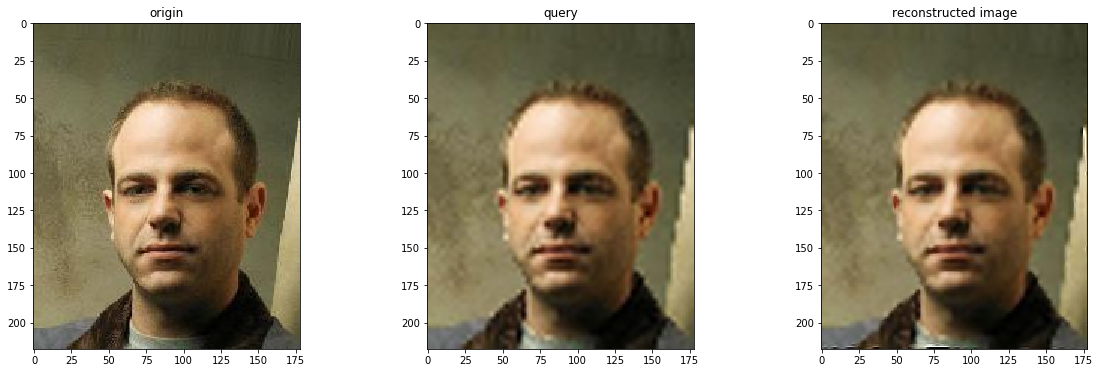

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(test_img)
axs[0].set_title("origin")
axs[1].imshow(test_img_resized)
axs[1].set_title("query")
axs[2].imshow(result)
axs[2].set_title("reconstructed image")